# Lab 12: Interpolation Exercises Part II

In [1]:
import numpy as np
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt

### Activity 1: Lagrange Interpolation

What are the coefficients of the legrange polynomial for the function $f(x) = x^3$ with $x=[0,1,2]$?

In [5]:
x = np.array([0, 1, 2])
y = x**3
poly = lagrange(x, y)

print("The fitted polynomial coefficients: ", poly.coef)
print("Representing the equation: ", Polynomial(poly.coef[::-1]))

The fitted polynomial coefficients:  [ 3. -2.  0.]
Representing the equation:  0.0 - 2.0 x + 3.0 x**2


Create a plot demonstrating the interpolation

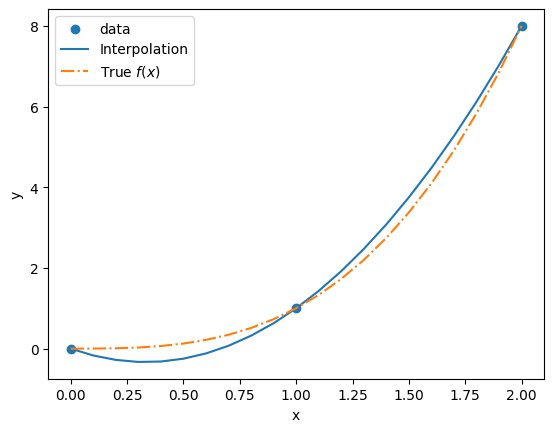

In [3]:
x_new = np.arange(0, 2.1, 0.1)

plt.scatter(x, y, label='data')

plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Interpolation')

plt.plot(x_new, x_new**3, label=r"True $f(x)$", linestyle='-.')

plt.xlabel('x')
plt.ylabel('y') 

plt.legend()

plt.show()

Notice the interpolated results still travels through the provided 3 data points, but represents a different polynomial than the 'true' function. So our interpolation may deviate from expected values over the range $[0,2]$ because we haven't provided enough data to fully constrain a cubic polynomial. 

Now repeat the process using 4 data points. Still use the function $f(x) = x^3$, but use the points $x = [0,1,2,3]$ Find the new polynomial fit and compare with the result in the previous plot. 

The fitted polynomial coefficients:  [1. 0. 0. 0.]
Representing the equation:  0.0 + 0.0 x + 0.0 x**2 + 1.0 x**3


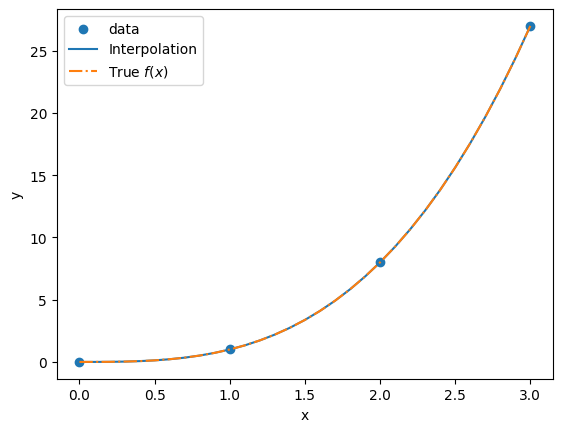

In [6]:
### Add Your Code Below ###
x_more = np.array([0, 1, 2, 3])
y_more = x_more**3
poly_more = lagrange(x_more, y_more)

print("The fitted polynomial coefficients: ", poly_more.coef)
print("Representing the equation: ", Polynomial(poly_more.coef[::-1]))


x_newer = np.arange(0, 3.1, 0.1)

plt.scatter(x_more, y_more, label='data')

plt.plot(x_newer, Polynomial(poly_more.coef[::-1])(x_newer), label='Interpolation')

plt.plot(x_newer, x_newer**3, label=r"True $f(x)$", linestyle='-.')

plt.xlabel('x')
plt.ylabel('y') 

plt.legend()

plt.show()


Notice how the interpolated function now matches the 'true' function since the degree of the polynomial corresponds to $n-1$ of the $n$ sampled data points!

### Activity 2: Barycentric Legrange Interpolation Example

Consider the function $f(x) = 1/(1+25x^2)$ over the range (-1,1). Compute the interpolation, plot and compare the function and interpolation. Additionall plot the error as a function of x. 

In [7]:
from scipy.interpolate import BarycentricInterpolator

def func(x):
    return 1/(1+25 * x**2)

In [16]:
#set number of data points to use
n = 20

#generate grid of 'n' x data points
x = np.linspace(-1, 1, n)

#call the Barycentric Interpolator on x
poly = BarycentricInterpolator(x)

#create polynomial function for the interpolator
poly.set_yi(func(x))

# create a more fine sampled x-grid for comparison
xnew = np.linspace(-1, 1, 200)

#perform interpolation
y_interp = poly(xnew)

# evalutate function on xnew
yactual = func(xnew)

#calculate error between interpolation and 'true' function
efunc=np.abs(func(xnew) - poly(xnew))

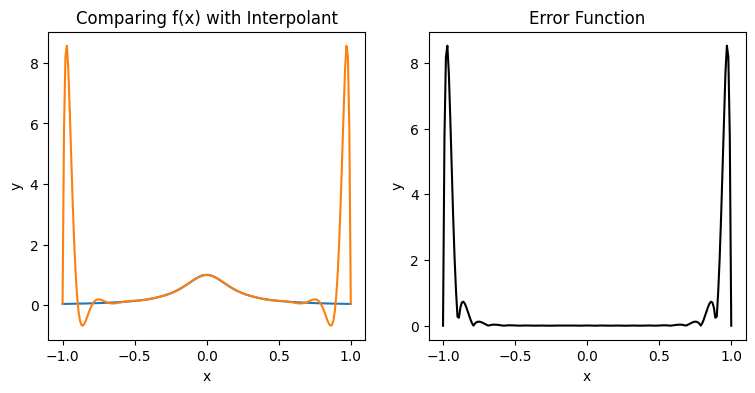

In [17]:
plt.figure(figsize=(9,4))


#create subplot comparing function with interpolation
plt.subplot(1, 2, 1)
plt.title('Comparing f(x) with Interpolant')
plt.plot(xnew, func(xnew))
plt.plot(xnew, poly(xnew))

plt.xlabel('x')
plt.ylabel('y') 

#create subplot for error function
plt.subplot(1, 2, 2)
plt.title('Error Function')
plt.plot(xnew,efunc,'k-')

plt.xlabel('x')
plt.ylabel('y') 


plt.show()

Try re-running the cells above for different nummber of interpolating points $N$ (E.g., try values 3, 7, 11, 21). Note the behavior where large $N$ gives better results in the middle of the data, but on the edges Runge phenomena become more significant!

### Activity 3: Tracking a Satellite's Position via Interpolation

Suppose we have the following data set that is tracking a satellite's altitude at 2 hour time intervals

In [18]:
time_measurements = np.array([0.0, 2.0, 4.0, 6.0, 8.0]) # in units hours
altitude = np.array([420, 418, 422, 419, 421]) # in units km

Use Lagrange interpolation to estimate altitude at t = 3.5 hours

In [19]:
poly = lagrange(time_measurements, altitude)

# new time to find
time_new = 3.5 

#print predicted postions
print(f"Predicted postion at time {time_new} hours: {Polynomial(poly.coef[::-1])(time_new):.2f} ")

Predicted postion at time 3.5 hours: 421.58 


 Use the data provided to plot the interpolated altitude profile from t = 0 to t = 8 hours

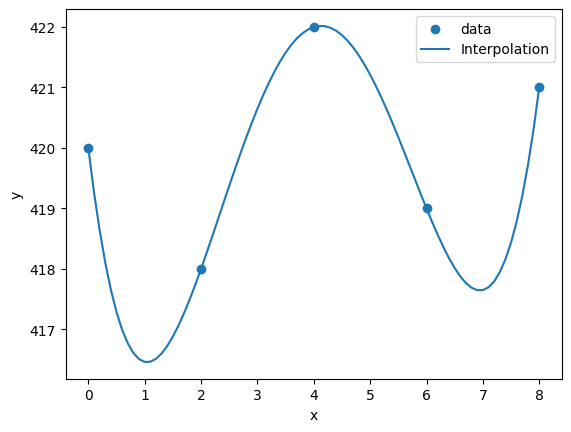

In [22]:
x_new = np.arange(0, 8.1, 0.1)

plt.scatter(time_measurements, altitude, label='data')

plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Interpolation')

#plt.plot(x_new, x_new**3, label=r"True $f(x)$", linestyle='-.')

plt.xlabel('x')
plt.ylabel('y') 

plt.legend()

plt.show()

Find the maximum altitude predicted by the interpolation. What time is this expected to occur?

In [23]:
#define function as 'y' values
y = Polynomial(poly.coef[::-1])(x_new)

#find maximum
maxval = np.max(y)

#find time at minimum
t_max=x_new[np.where(y==maxval)][0]

print(f"The predicted maximum altitude is: {maxval:.2f}, at time: {t_max:.1f}")

The predicted maximum altitude is: 422.02, at time: 4.1


What is the predicted minimum value? What time is this expected to occur?

In [24]:
### ADD YOUR CODE BELOW ###
#define function as 'y' values
y = Polynomial(poly.coef[::-1])(x_new)

#find maximum
minval = np.min(y)

#find time at minimum
t_min=x_new[np.where(y==minval)][0]

print(f"The predicted maximum altitude is: {minval:.2f}, at time: {t_min:.1f}")




The predicted maximum altitude is: 416.46, at time: 1.0


### Activity 4: Temperature Profile Reconstruction

Temperature sensors are placed at different positions along a 1-meter rod, providing us with the following data

In [25]:
positions = np.array([0.0, 0.2, 0.5, 0.8, 1.0])  # meters
temperatures = np.array([100, 85, 70, 65, 60])   # Celsius

Predict the temperature at x = 0.35 m via Legrange Interpolation

In [32]:
### Add Your Code Below ###
poly = lagrange(positions, temperatures)
print(f"At x = 0.35, T = {poly(0.35):.2f} degrees Celsius")

At x = 0.35, T = 75.98 degrees Celsius


Plot the complete temperature profile

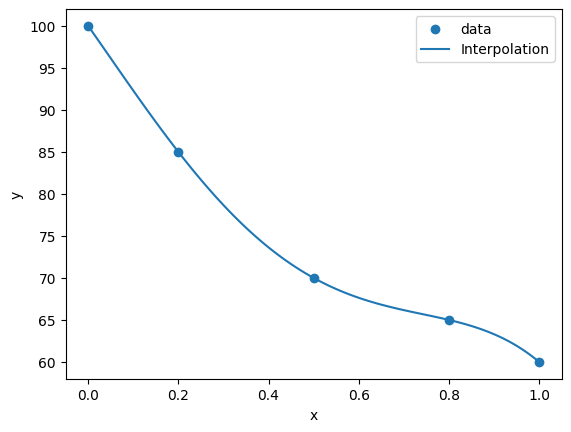

In [33]:
x_new = np.arange(0, 1.01, 0.01)

plt.scatter(positions, temperatures, label='data')

plt.plot(x_new, Polynomial(poly.coef[::-1])(x_new), label='Interpolation')


plt.xlabel('x')
plt.ylabel('y') 

plt.legend()

plt.show()

We can derive even more information about the system in this case. Consider the derivative of the fitted polynomial as a way of approximating the temperature gradient across the rod. 

In [34]:
print("Interpolated equation: ", Polynomial(poly.coef[::-1]))

# define interpolated function so we don't overwrite it by mistake!
Tprofile_poly = Polynomial(poly.coef[::-1])

#Take derivative
derivative_coefficients = np.polyder(poly.coef)

print("Derivative of polynomial equation: ", Polynomial(derivative_coefficients[::-1]))

# define interpolated function so we don't overwrite it by mistake!
Tgrad_poly = Polynomial(derivative_coefficients[::-1])

Interpolated equation:  100.0 - 76.52777778 x - 19.02777778 x**2 + 152.77777778 x**3 -
97.22222222 x**4
Derivative of polynomial equation:  -76.52777778 - 38.05555556 x + 458.33333333 x**2 - 388.88888889 x**3


Take a moment to double check that the derivative is correct!

Now plot the results

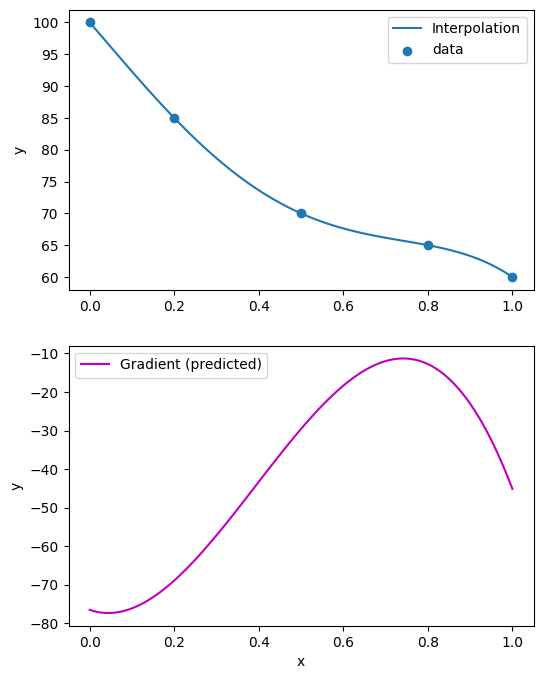

In [35]:
plt.figure(figsize=(6,8))

#create subplot comparing function with interpolation
plt.subplot(2, 1, 1)
plt.plot(x_new, Tprofile_poly(x_new), label='Interpolation')
plt.scatter(positions, temperatures, label='data')

plt.legend()

#plt.xlabel('x')
plt.ylabel('y') 

#create subplot for error function
plt.subplot(2, 1, 2)
plt.plot(x_new, Tgrad_poly(x_new),'m-',  label = 'Gradient (predicted)')

plt.xlabel('x')
plt.ylabel('y') 

plt.legend()

plt.show()

Notice how these methods give us a wealth of additional information on various types of physical systems even with sparsely sampled points!